# Larry Sanders's Dream Home

Our client Mr. Larry Sanders, shares one of the biggest american dreams: he wants to buy a home. The wished location is King County - Washington. It is one of the healthiest Counties in the USA, where life expectancy reaches 82.3 years, way above national average. It is also a wealthy area, where median household income is also above national average, and reaches $122,148 per household.  (Source: https://datausa.io/).

Mr. Sanders has a limited budget, and wants a waterfront home. It has to be nice and isolated, but still within a central neighborhood. One important criteria is that the neighborhood should not have many kids, since Mr. Sanders prefers that his children does not interact with others (too many germs out there!)





### Summary of Client's Demands:
- Waterfront home
- Limited Budget
- Nice & Isolated Property
- Central Neighborhood
- No kids Neighborhood
- Bonus: Data about area cleaness 

### Working with the provided Data

For this client's analysis, we will be working with the King County Database. We will first import it, and then filter relevant information for our case. We will be also cleaning the Data, to make sure we have the best outcome possible through out analysis. 

## Setup, Import and first small Analysis

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data
df = pd.read_csv("../data/KingCounty_joinedTable.csv", sep=";")

In [3]:
# Have a first quick look on the data
df.head()

# I already see some null data, but overall the import worked and i can continue analysing the dataframe

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


In [4]:
# Get a quick info overview of the data
df.info()

# I can see that all columns have proper value types except the "date", this is going to cause issues
# I can also see that we have 21597 entries in total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [5]:
# Get a first statistics overview from the data columns
# I also rounded the data down to 2 decimals, to make it better readable
df.describe().round(2)

# Since there are so many columns, i cannot see all of them in the jupyter preview. So im exporting the output to 
# .csv file to have a better view
df.describe().to_csv("DataFrameExport/general_describe.csv")

# That gave me some first informations, like:
# Price - min: 78000$ max: 7700000$ | so depending on the budget of the client, we might be able to reduce the entries a lot by the price for example

## Data Cleaning 

In [6]:
# Looking for null data
df.isnull().sum()

# I can see that the columns Waterfront, sqft_basement and yr_renovated have a lot of null data

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

In [7]:
# So im going to replace the null entries with a 0

# Fill missing values for critical columns
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].fillna(0)

# And Confirm there are no more NaNs in those columns
print(df[['waterfront', 'view', 'sqft_basement']].isnull().sum())


waterfront       0
view             0
sqft_basement    0
dtype: int64


In [8]:
#Checking for Duplicates
df.duplicated().value_counts()
#No Duplicates were found

False    21597
Name: count, dtype: int64

In [9]:
# Transforming Date Column from Object to Date Format
df ['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")

# If i want to use the yr_renovated, i should also transform it into an int 
df["yr_renovated"] = df["yr_renovated"].fillna(0).round(0).astype(int)
df.yr_renovated = df.yr_renovated.apply(lambda x: int(str(x)[:4]))

#Checking for Data Types
df.dtypes

# All are integers and floats, except for Date (which was an object and is datetime now)
# I think the data is clean enough to work with it now

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id.1                      int64
dtype: object

## Three Hypothesis (including one Geographical)

### H1: If a Waterfront house is not renovated, the price is cheaper.

There are 146 Waterfront homes
From the Waterfront homes, 117 are not renovated
From the Waterfront homes, 29 are renovated
Median price for Renovated homes: 1230000.0$
Median price for non Renovated: 1600000.0$
Median sq. ft. price_for not renovated homes: 532.26
Median sq. ft. price_for renovated homes: 471.7


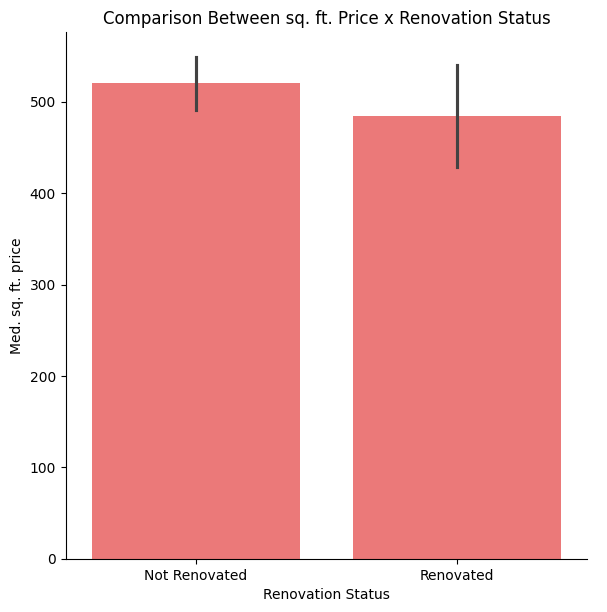

In [10]:
# Since my client is only interested in waterfront homes, i will filter for that
df_waterfront = df.query("waterfront > 0")
print("There are",df_waterfront.value_counts().sum(), "Waterfront homes")
# Output: There are 146 Waterfront homes

df_waterfront_not_renovated = df_waterfront.query("yr_renovated <= 0")
print("From the Waterfront homes,",df_waterfront_not_renovated.value_counts().sum(), "are not renovated")
# Output: From the Waterfront homes, 117 are not renovated

df_waterfront_renovated = df_waterfront.query("yr_renovated > 0")
print("From the Waterfront homes,",df_waterfront_renovated.value_counts().sum(), "are renovated")
# Output: From the Waterfront homes, 29 are renovated

# So we know now, that from the 146 Waterfront homes that exist, 29 are renovated and 117 are not. 

# For my hypothesis i need to know if the non renovated homes are actually cheaper. 
# So ill get the median price for renovated and unrenovated waterfront homes.
print("Median price for Renovated homes: "+ str(df_waterfront_renovated.price.median().round(2)) + "$")
print("Median price for non Renovated: " +str(df_waterfront_not_renovated.price.median().round(2)) + "$")
# Renovated:     1230000.0$
# Non Renovated: 1600000.0$

# To go further with my investigation, i want to have a column which specifies if a home
# is renovated or not. I assume that a home was renovated when the renovation year is >0
df_waterfront["renovation_status"] = df_waterfront["yr_renovated"].apply(
              lambda x: "Renovated" if x > 0 else "Not Renovated")

# Then i want to have a column which represents the price per sq. ft. 
df_waterfront["price_per_sqrfoot"] = (df_waterfront.price / df_waterfront.sqft_living).round(2)

# After that i create a new dataframe, groping houses by renovation status and the median price
# per sqr foot
price_by_renovation = df_waterfront.groupby('renovation_status')['price_per_sqrfoot'].median()
print("Median sq. ft. price_for not renovated homes:",price_by_renovation[0])
print("Median sq. ft. price_for renovated homes:",price_by_renovation[1])
# Not Renovated: 532.26$, Renovated: 471.70$ per sq. ft.

# Now i create a bar diagram to visualize the median sq. ft. price for renovated/unrenotated
# waterfront homes
g = sns.catplot(
    data=df_waterfront, kind="bar",
    x ="renovation_status", y = "price_per_sqrfoot",
    alpha = .6, height= 6, color = "red"
)

plt.xlabel("Renovation Status")
plt.ylabel("Med. sq. ft. price")
plt.rcParams['font.family'] = 'Verdana'
g.set(title="Comparison Between sq. ft. Price x Renovation Status")
plt.show()



My first hypothesis appears to be wrong. Even if the median for the house prices are lower, the price per sq. ft. for renovated homes is cheaper. So depending on the size of the house it might be better to buy a renovated home. (Aside from eventual costs in the future for unrenovated homes) 

### H2: If the purchase is done during winter months, it is likely that prices will be lower.

In [11]:
# To find out which sale happened in which season, i prepare a function that can return a season category based on a
# passed date parameter

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    

In [12]:
# Then i create a new columns for the season category by passing the date of each entrie trough my function
df_waterfront["season"] = df_waterfront["date"].apply(get_season)

# Quick look if my column was created successfully
df_waterfront.head(2)

# The column was created and has values inside

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,renovation_status,price_per_sqrfoot,season
49,822039084,3.0,2.50,2753.0,65005.0,1.0,1.0,2.0,5,9,...,-122.451,2680.0,72513.0,2015-03-11,1350000.0,822039084,50,Not Renovated,490.37,Spring
230,8096000060,2.0,1.75,1450.0,15798.0,2.0,1.0,4.0,3,7,...,-122.375,2030.0,13193.0,2015-04-13,655000.0,8096000060,231,Renovated,451.72,Spring


In [13]:
# Now i want to create a new dataframe grouped by season and median sq. ft. price
price_by_season = df_waterfront.groupby('season')['price_per_sqrfoot'].median()
print(
    "","Med. house sale price for Spring",price_by_season[0],"\n",
    "Med. house sale price for Fall",price_by_season[1],"\n",
    "Med. house sale price for Summer",price_by_season[2],"\n",
    "Med. house sale price for Winter",price_by_season[3]
    )

# Output: 
#  Med. house sale price for Spring 532.26 
#  Med. house sale price for Fall 554.91 
#  Med. house sale price for Summer 488.81 
#  Med. house sale price for Winter 479.53

 Med. house sale price for Spring 532.26 
 Med. house sale price for Fall 554.91 
 Med. house sale price for Summer 488.81 
 Med. house sale price for Winter 479.53


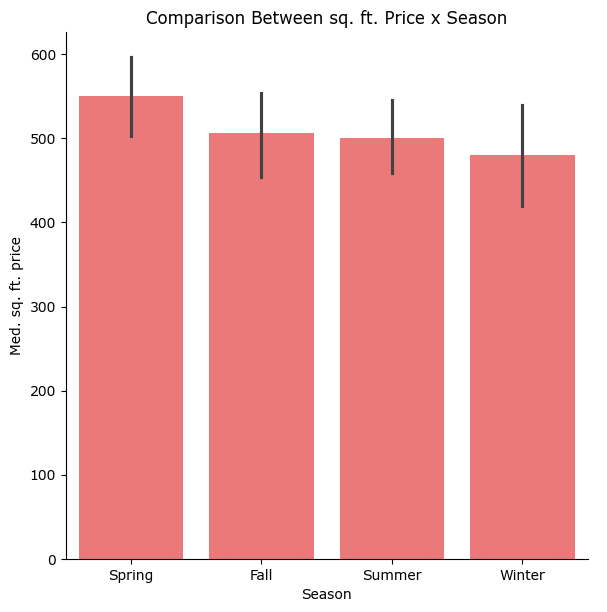

In [14]:
# For a visual presentation im going to plot a bar diagram to visualize the median sq. ft. price per season
# for waterfront view houses
g = sns.catplot(
    data=df_waterfront, kind="bar",
    x ="season", y = "price_per_sqrfoot",
    alpha = .6, height= 6, color = "red"
)

plt.xlabel("Season")
plt.ylabel("Med. sq. ft. price")
plt.rcParams['font.family'] = 'Verdana'
g.set(title="Comparison Between sq. ft. Price x Season")
plt.show()


### H3: Houses closer to central areas tend to have fewer bedrooms and smaller nearby houses, suggesting fewer families with children.

For the thirs hypothesis i was thinking how to determine what the central area of King County might be, and came to the conclusion the area of Seattle seems to be most central. I got from this website all the zip codes from Seattle to use them with my data: https://simplemaps.com/city/seattle/zips

In [15]:
# With the zip codes of Seattle from the mentioned website, i created a list, which i intend to use to categorize my home data entries
central_zip_codes = [98101,98102,98103,98104, 
                     98105,98106,98107,98108,
                     98109,98112,98115,98116,
                     98117,98118,98119,98121,
                     98122,98125,98126,98133,
                     98134,98136,98144,98146,
                     98154,98164,98174,98177,
                     98178,98195,98199]

# Then i defined a function that returns a string with the value "central" or "notCentral"
# based on the passed zip code parameter, checking against my central_zip_codes list 
def get_central(zipCode):
    if zipCode in central_zip_codes:
        return "central"
    else:
        return "notCentral"
    
# Now i want to create a new column and categorize it to cental/non central waterfront homes
# based on their zip code using my function
df_waterfront["zip_category"] = df_waterfront["zipcode"].apply(get_central)

# I will check again if my columns was properly created
df_waterfront.head(2)

# The column "zip_category" was successfully created and filled


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,date,price,house_id,id.1,renovation_status,price_per_sqrfoot,season,zip_category
49,822039084,3.0,2.50,2753.0,65005.0,1.0,1.0,2.0,5,9,...,2680.0,72513.0,2015-03-11,1350000.0,822039084,50,Not Renovated,490.37,Spring,notCentral
230,8096000060,2.0,1.75,1450.0,15798.0,2.0,1.0,4.0,3,7,...,2030.0,13193.0,2015-04-13,655000.0,8096000060,231,Renovated,451.72,Spring,notCentral


In [16]:
# I want to know now how many waterfront homes are left, after filtering them by my central zip codes

# Counting the central and non central waterfront houses 
df_waterfront_central = df_waterfront.query('`zip_category` == "central"')
df_waterfront_nonCentral = df_waterfront.query('`zip_category` == "notCentral"')
print("Central waterfront home count:",df_waterfront_central["zip_category"].count())
print("Non Central waterfront home count:",df_waterfront_nonCentral["zip_category"].count())
# Output: 
# Central waterfront home count: 38
# Non Central waterfront home count: 108

Central waterfront home count: 38
Non Central waterfront home count: 108


In [17]:
# Since i know know how many central and non central waterfront homes are left, i want to continue with the bedroom hypothesis

# I create a new dataframe grouped by zip_code_category (central, nonCentral) by the average bedrooms
bedroms_per_zipCategory = df_waterfront.groupby('zip_category')['bedrooms'].mean()
bedroms_per_zipCategory.head(2)



zip_category
central       3.526316
notCentral    3.287037
Name: bedrooms, dtype: float64

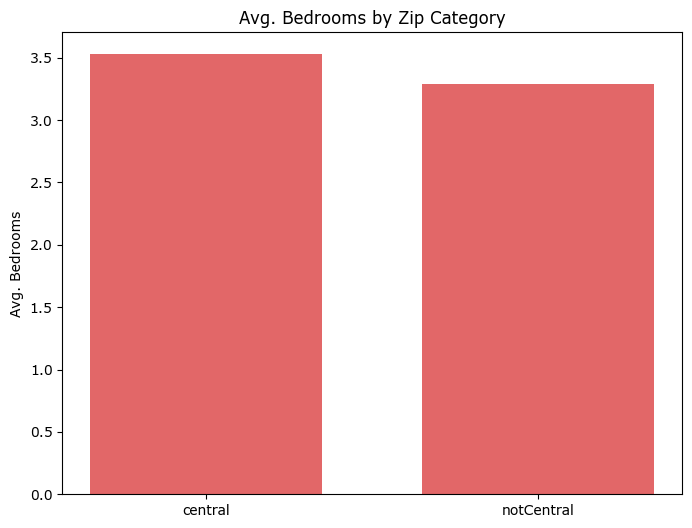

In [18]:
# Now i want to create a bar diagram that represents the average number of bedrooms 
# for central and non central waterfront homes

#Group and aggregate
agg_data = df_waterfront.groupby('zip_category').agg({
    'bedrooms': 'mean',
}).reset_index()

# Setup
categories = agg_data['zip_category']
bedrooms = agg_data['bedrooms']

# Setup bar positions
x = np.arange(len(categories))
width = 0.7

# Create figure
fig, ax = plt.subplots(figsize=(8,6),facecolor=('none'))

# Plot bars
bars1 = ax.bar(x, bedrooms, width, label='Avg Bedrooms', color='tab:red', alpha=0.7)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Avg. Bedrooms')
ax.set_title('Avg. Bedrooms by Zip Category')

plt.show()


Based on the result, my hypothesis that homes in central areas haver fewer bedrooms was proven wrong. But to say is also that the difference is very small. 

### Home recommendations for Larry

I will create some filters that are matching the personna of Larry

- Budget: 1000000$

- In theory homes with a bigger lot size should be farther away from each other, and therefore less crowded. 
So i decide to add a minimum lot size of 10000 sq. ft.

- Since Larry has kids, i assume that we should have a minimum bedroom size of 3
- He is also scared of germs so i go with a minimum home condition of 3 and a minimum home quality of 7
- Since he wants to have waterfront home, he might want to have a good view, so i set a minimum of 2


In [19]:
# Im going create a dataframe with the above mentioned filter values
# Larry's preferences
larry_budget = 1_000_000  # $1M
min_lot_size = 10000      # 10,000 sqft for isolation

# Apply filters
larry_houses = df[
    (df['waterfront'] == 1) &
    (df['price'] <= larry_budget) &
    (df['bedrooms'] >= 3) &
    (df['condition'] >= 3) &
    (df['view'] >= 2) &
    (df['grade'] >= 7) &
    (df['sqft_lot'] >= min_lot_size)
]

# Sort by price ascending
larry_houses = larry_houses.sort_values(by='price')

# results
print(larry_houses[['id', 'price', 'bedrooms', 'sqft_lot', 'condition', 'view', 'grade']].head())
print(f"Found {len(larry_houses)} houses for Larry.")

# Found 21 houses for Larry.

               id     price  bedrooms  sqft_lot  condition  view  grade
11544  2013802030  357000.0       3.0   53882.0          3   4.0      7
18833  7631800110  380000.0       3.0   17342.0          3   4.0     10
8270    221029019  400000.0       3.0   32718.0          3   4.0      7
17460  6329000185  540000.0       3.0   23361.0          3   4.0      8
9845    121039083  629000.0       3.0   12367.0          4   4.0      8
Found 21 houses for Larry.


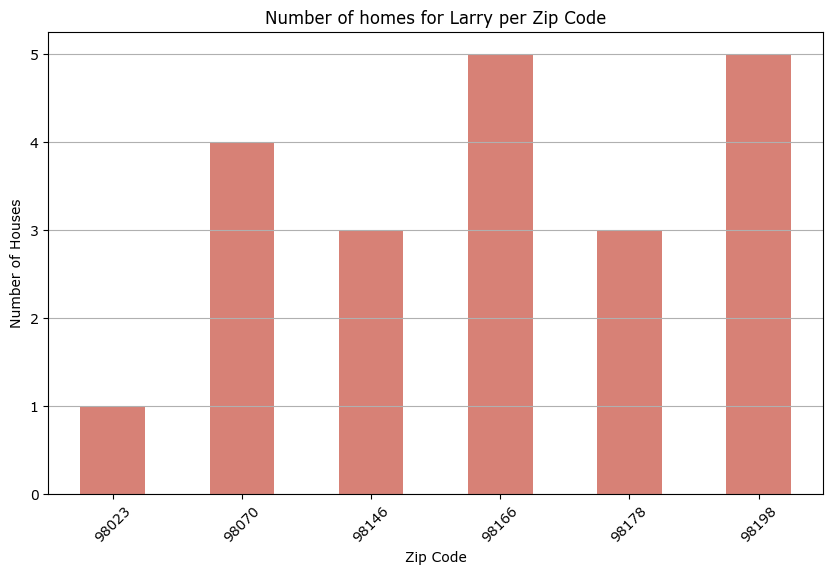

In [20]:
# Based on the appliance of the sq. ft. lot size, i want to see which zip codes provive the most probable amount of homes

# Count Larry’s houses per zip code
zip_counts = larry_houses['zipcode'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
zip_counts.plot(kind='bar', color="#d78176")
plt.title("Number of homes for Larry per Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [21]:
# Larry didn’t say this explicitly, but if he’s germ-conscious, renovated homes may appeal to him.

# Im going to add a new column: was it renovated after 2000?
larry_houses['renovated_recently'] = larry_houses['yr_renovated'].apply(
    lambda x: True if x >= 1990 else False
)

# I want to now also how many homes were recently renovated?
recent_renovations = larry_houses['renovated_recently'].sum()
print(f"Found {recent_renovations} houses renovated after 2000.")


Found 2 houses renovated after 2000.


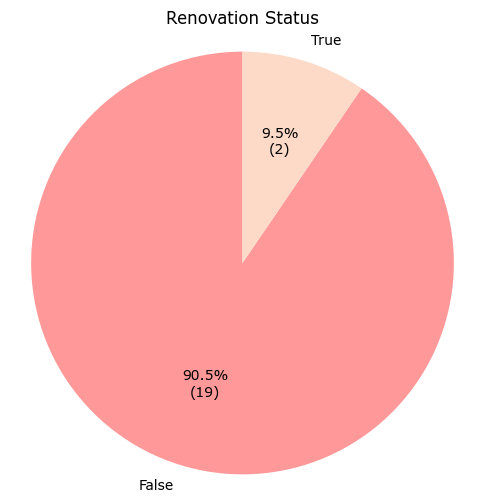

In [22]:
# Im going to create a pie chart to have a comparison between renovated und non renovated homes from our filtered homes

# Count occurrences
status_counts = larry_houses['renovated_recently'].value_counts()

# Custom function to show percentage and count
def autopct_format(pct, all_vals):
    count = int(round(pct/100.*sum(all_vals)))
    return f"{pct:.1f}%\n({count})"

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    status_counts, 
    labels=status_counts.index, 
    autopct=lambda pct: autopct_format(pct, status_counts),
    startangle=90,
    colors=['#ff9999', "#FCDAC7"]
)

plt.title('Renovation Status')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

So consider Larry values cleanness and umcomplicated things, i would go with the 2 renovated homes.

In [ ]:
# Im going to filter by renovated houses and export it into a final .csv file to explore further
final_home_recommendation = larry_houses.query('`renovated_recently` == True')
final_home_recommendation.to_csv("DataFrameExport/RenovatedHomesForLarry.csv")
final_home_recommendation.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,renovated_recently
17643,3222049151,3.0,2.5,2990.0,10711.0,1.0,1.0,4.0,3,9,...,98198,47.3573,-122.324,2870.0,11476.0,2014-10-30,820000.0,3222049151,17644,True
1259,7636800041,3.0,4.5,4380.0,47044.0,2.0,1.0,3.0,3,9,...,98166,47.4734,-122.365,2460.0,18512.0,2014-06-25,995000.0,7636800041,1260,True
